In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-07-11 09:52:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-11 09:52:03 (134 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
#Import the helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
#get the 10% of out training example
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2023-07-11 09:52:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   211MB/s    in 0.8s    

2023-07-11 09:52:04 (211 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
#check out how many images and sub-directories are there in our data
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [ ]:
import tensorflow as tf

In [ ]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                       image_size=IMG_SIZE,
                                                                       label_mode="categorical",
                                                                       batch_size=BATCH_SIZE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                      image_size=IMG_SIZE,
                                                                      label_mode="categorical",
                                                                      batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[  4.413265    9.770409    1.9285716]
   [ 11.071429   16.142859   19.857145 ]
   [ 13.709184   20.42857    30.989796 ]
   ...
   [124.857124   97.857124   90.4286   ]
   [123.07144    99.07144    97.07144  ]
   [121.51526   100.51526    99.51526  ]]

  [[  2.6887753   8.045918    1.2857144]
   [  8.852041   13.790817   17.438778 ]
   [ 13.255102   20.255102   28.397959 ]
   ...
   [125.42853    98.42853    91.       ]
   [122.14287    98.14287    94.4184   ]
   [122.07143   101.07143   100.07143  ]]

  [[  4.          6.2806125   0.7193878]
   [  6.5714293  10.571429   12.887756 ]
   [ 12.551021   19.260204   24.785713 ]
   ...
   [126.16837    99.16837    91.31132  ]
   [120.39796    96.39796    92.39796  ]
   [119.571465   97.928604   94.71432  ]]

  ...

  [[ 99.22933    68.15294    64.93861  ]
   [ 95.601906   65.51528    61.94381  ]
   [ 93.49987    64.85708    61.071342 ]
   ...
   [192.61739   187.61739   184.61739  ]
   [191.51534   186.51534   183.51534  ]
   [1

##Model 0: Building a transfer learning model using the keras Functional API

The sequential API is straight-forward, it runs our layers in sequential order.

But the functional API gives us more flexibility with our models

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns arent updated)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using Rednet50v2 you will need to normalize inputs(you dont have to do for EfficientNet)
#x = tf.keras.layers.experminental.preprocessing.Rescalling(1/255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing inouts through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile for the model
model_0.compile(loss="categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# 10. Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data = test_data_10_percent,
                                 validation_steps = int(0.25 * len(test_data_10_percent)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])

16705208/16705208 [==============================] - 0s 0us/step
Shape after passing inouts through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230711-095210


Epoch 1/5
24/24 [==============================] - 20s 262ms/step - loss: 1.8243 - accuracy: 0.4573 - val_loss: 1.2493 - val_accuracy: 0.7385
Epoch 2/5
24/24 [==============================] - 5s 182ms/step - loss: 1.0660 - accuracy: 0.7693 - val_loss: 0.8261 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 4s 141ms/step - loss: 0.7719 - accuracy: 0.8347 - val_loss: 0.6618 - val_accuracy: 0.8536
Epoch 4/5
24/24 [==============================] - 7s 288ms/step - loss: 0.6290 - accuracy: 0.8627 - val_loss: 0.5897 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 4s 143ms/step - loss: 0.5367 - accuracy: 0.8800 - val_loss: 0.5417 - val_accuracy: 0.8701


In [ ]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 88ms/step - loss: 0.5471 - accuracy: 0.8668


[0.5471022725105286, 0.8668000102043152]

In [ ]:
#check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
#summary of base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
#Summary of whole model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


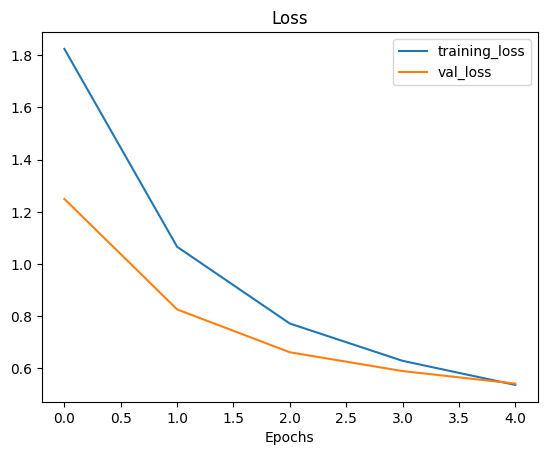

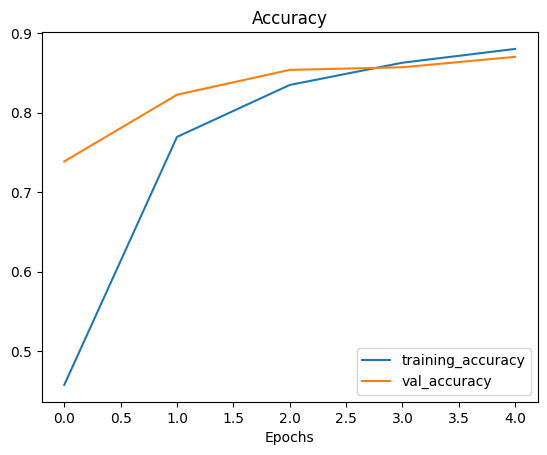

In [ ]:
#checking out our models training curves
plot_loss_curves(history_10_percent)

##Getting a feature from the trained model

Lets demonstrate the Global Average Pooling 2D Layer.....

We have tensor after our model goes through base_model of shape(None,7,7,1280).

But then when it passes through GlobalAveragePooling2D, it turns into(None,1280).

Lets use a similar shaped tenosr of (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [ ]:
#Define the input shape
input_shape = (1,4,4,3)

#create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor}\n")

#Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D gloabl average pooled random tensor:\n {global_average_pooled_tensor}\n")

#check out the shape of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D gloabl average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor: (1, 3)


In [ ]:
#Lets replicate the GlobalAveragePooling 2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

##Running a series of Transfer Learning experiments

1. model_1 - use feature extraction learning with 1% of the training data with data augmentation.

2. model_2 - use feature extraction learning with 10% of the training with data augmentation.

3. model_3 - use fine tuning transfer learning on 10% of the training data with data augmentation

4. model_4 - use fine-tuning learning on 100% of the training data with data augmentation.




###Getting and pre-processing data for model_1

In [ ]:
#Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-07-11 09:53:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  58.4MB/s    in 2.2s    

2023-07-11 09:53:02 (58.4 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
#create training and test dirs
train_dir_1_percent = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"

In [ ]:
#how many images are we working with
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/hambu

In [ ]:
import tensorflow as tf
#Setup data loaders
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###Adding data augmentation right into the model

To add data augmentation right into the model, we can use the layers inside:

* tf.keras.layers.experimental.preprocessing()

Benifits of doing this with TensorFlow Data augmentation

* Preprocessing of images(augmenting them) happens on the GPU(much faster) rather than the CPU.

* Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#create data augmentation stage with horizontal flipping , rotations, zooms, etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) #keep for models like ResNet50V2 but EfficientNet's having rescaling built-in
], name="data_augmentation")

###Visualize our data augmentation layer

tf.Tensor(
[[[ 83.49223    84.15942    38.191387 ]
  [ 86.95317    84.52307    46.839745 ]
  [ 83.50194    78.4588     48.410492 ]
  ...
  [113.64763    22.530344   14.785075 ]
  [113.77008    20.830498   13.452165 ]
  [112.58611    19.922752   11.808842 ]]

 [[ 77.83519    79.36869    33.105034 ]
  [ 76.7833     74.34897    37.28585  ]
  [ 75.04029    69.59135    40.680298 ]
  ...
  [114.48639    22.84725    14.855083 ]
  [114.294586   21.298967   13.351287 ]
  [113.880165   20.907627   12.89833  ]]

 [[ 85.497696   89.609924   37.314663 ]
  [ 77.781006   77.098495   33.247253 ]
  [ 78.96016    74.012184   39.46456  ]
  ...
  [114.767136   22.610783   14.524276 ]
  [114.30191    21.301916   13.301915 ]
  [113.85018    20.850178   12.85018  ]]

 ...

 [[ 45.768784   33.675198   21.286367 ]
  [ 42.125977   31.028336   18.778082 ]
  [ 41.5442     31.505655   18.839607 ]
  ...
  [ 48.316174   19.559052   14.393815 ]
  [ 72.35594    43.9275     38.70182  ]
  [119.70316    91.542885   86.76

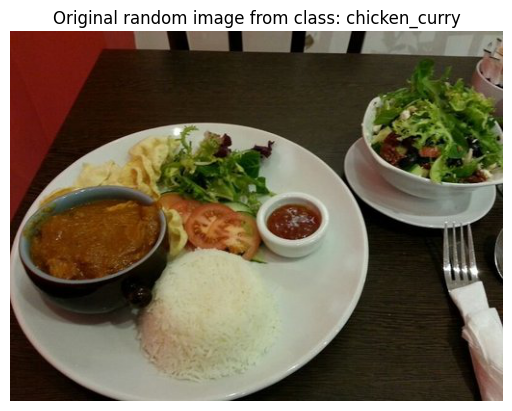

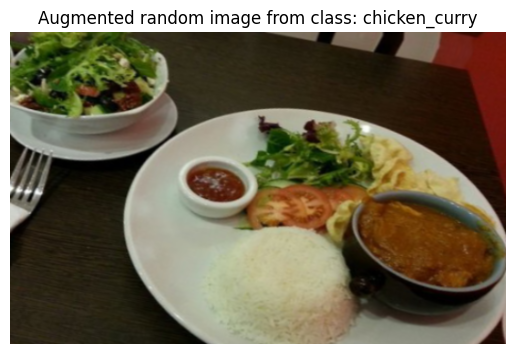

In [ ]:
#view a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" +random_image

#Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

#Plot the augmented random image
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img/255.))
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);
print(augmented_img)


###Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230711-095308
Epoch 1/5
3/3 [==============================] - 16s 4s/step - loss: 2.4874 - accuracy: 0.0571 - val_loss: 2.3054 - val_accuracy: 0.1530
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.2005 - accuracy: 0.1857 - val_loss: 2.1775 - val_accuracy: 0.2434
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 2.0298 - accuracy: 0.3571 - val_loss: 2.0445 - val_accuracy: 0.3207
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8156 - accuracy: 0.4571 - val_loss: 1.9684 - val_accuracy: 0.3635
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.6796 - accuracy: 0.5571 - val_loss: 1.8705 - val_accuracy: 0.4095


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
#evaluate on the full test dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 82ms/step - loss: 1.8565 - accuracy: 0.4172


[1.8564752340316772, 0.4171999990940094]

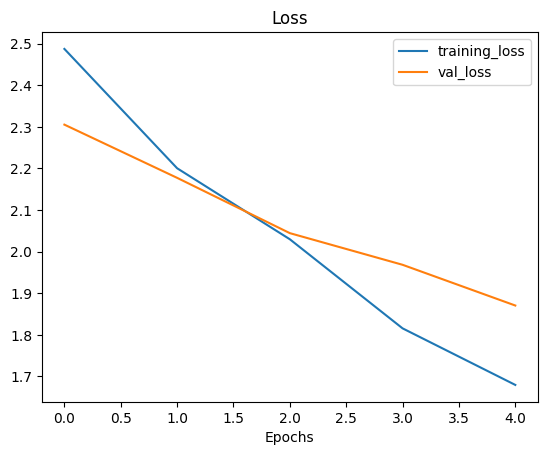

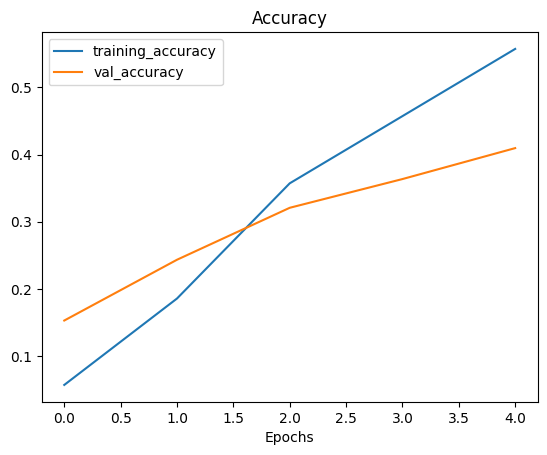

In [ ]:
plot_loss_curves(history_1_percent)

##Model 2: Feature extraction transfer learning model with 10% of data augmentation

In [ ]:
#get 10% of the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-07-11 09:53:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2023-07-11 09:53:51 (170 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
#How many images are there in the directory
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#create model 2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

#Build data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    #preprocessing.Rescaling(1./255)
    #if youre using a model such as Resnet50V2, youll need to rescale your data, efficientnet has rescaling built-in
], name="data_augmentation")

#setup the input shape of the model
input_shape=(224,224,3)

#create a frozen base model(also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create the inputs and the outputs(including the layers inbetween)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) #augment our training images(augmentation doesnt occur on test data)
x=base_model(x,training=False) #pass the augmented images to base model but keep it in inference mode, this also insures batchrooms layers dont get updated
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

#compile
model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

###Creating a ModelCheckpoint callback

The ModelCheckpoint callback saves our model(the full model or just the weights) during training. This is useful so we can come and start where we left off.

In [ ]:
#set checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoints.ckpt"

#create a model checkpoint callback that saves the model's weight only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose=1)

###Fit model 2 in the ModelCheckpoint callback

In [ ]:
#Fit the model saving checkpoints every epoch
intial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=intial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name = "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230711-095356
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0171 - accuracy: 0.3253
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 24s 680ms/step - loss: 2.0171 - accuracy: 0.3253 - val_loss: 1.4570 - val_accuracy: 0.6661
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3275 - accuracy: 0.7000
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 14s 590ms/step - loss: 1.3275 - accuracy: 0.7000 - val_loss: 0.9978 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0092 - accuracy: 0.7747
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 12s 495ms/step - loss: 1.0092 - accuracy: 0.7747 - val_loss: 0.7981 - val_accuracy: 0.828

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 68ms/step - loss: 0.6245 - accuracy: 0.8452


[0.624464750289917, 0.8452000021934509]

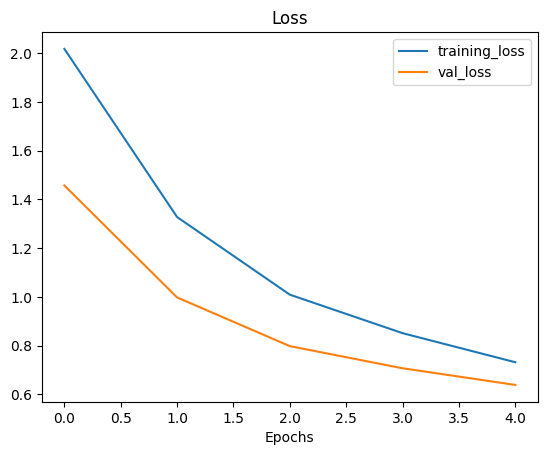

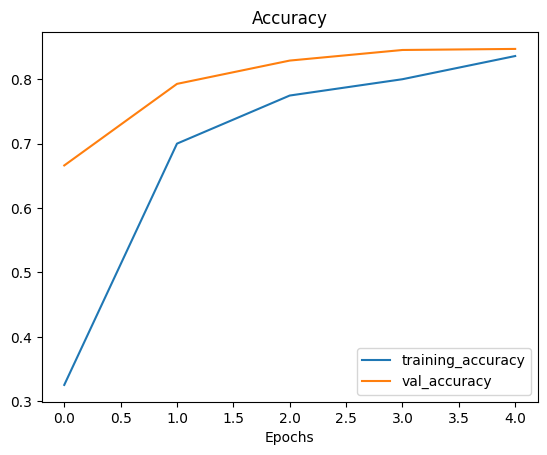

In [ ]:
#Plot the model loss curves
plot_loss_curves(history_10_percent_data_aug)

###Loading in checkpointed weights

Loading in checkpoints weights returns a model to a specific checkpoint.

In [ ]:
#Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
#Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.6245 - accuracy: 0.8452


In [ ]:
#If the results from our previously evaluated model_2 match the loaded weights, everything has worked
results_10_percent_data_aug == loaded_weights_model_results

False

In [ ]:
results_10_percent_data_aug

[0.624464750289917, 0.8452000021934509]

In [ ]:
loaded_weights_model_results

[0.6244645714759827, 0.8452000021934509]

In [ ]:
#check to see if the loaded model results are very close to our previous non-loaded model
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
#checck the difference between the two results
print(np.array(results_10_percent_data_aug)- np.array(loaded_weights_model_results))

[1.78813934e-07 0.00000000e+00]


##Model 3: Fine-tuning an existing model on 10 percent of data

> **NOTE:** Fine-tuning usually works better after training a feature extractionn model for a few epochs with large amounts of custom data.

In [ ]:
  model_2.layers

In [ ]:
#Check whether are these layers trainable
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7faa5665d870> True
<keras.engine.sequential.Sequential object at 0x7faa512f8820> True
<keras.engine.functional.Functional object at 0x7faa509a8dc0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7faa3a16ba00> True
<keras.layers.core.dense.Dense object at 0x7faa508a9030> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
#How many trainable variables are there in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
#To begin with fine tuning, lets start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

#Freeze all the layers except the last 10
for layers in base_model.layers[:-10]:
  layers.trainable = False

#Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #when fine tuning you typically want to lower the learning rate
                metrics=["accuracy"])

In [ ]:
#check which layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
#Now we have unfrozen some of the layers closer to the top, how many trainable variables are there?
print(len(model_2.trainable_variables))

12


In [ ]:
initial_epochs = 5

#Finetune for another 5 epoch
fine_tune_epochs = initial_epochs + 5

#Refit the model(same as model 2 except with more trainable layer)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25*len(test_data)),
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],#satrat training from previous last epoch
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230711-095540


Epoch 5/10
24/24 [==============================] - 25s 567ms/step - loss: 0.6287 - accuracy: 0.8227 - val_loss: 0.4977 - val_accuracy: 0.8470
Epoch 6/10
24/24 [==============================] - 11s 434ms/step - loss: 0.4945 - accuracy: 0.8560 - val_loss: 0.4483 - val_accuracy: 0.8635
Epoch 7/10
24/24 [==============================] - 11s 442ms/step - loss: 0.4500 - accuracy: 0.8653 - val_loss: 0.4408 - val_accuracy: 0.8553
Epoch 8/10
24/24 [==============================] - 10s 403ms/step - loss: 0.4007 - accuracy: 0.8853 - val_loss: 0.4290 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 9s 329ms/step - loss: 0.3384 - accuracy: 0.8960 - val_loss: 0.3913 - val_accuracy: 0.8586
Epoch 10/10
24/24 [==============================] - 11s 423ms/step - loss: 0.3237 - accuracy: 0.9120 - val_loss: 0.4183 - val_accuracy: 0.8618


In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.4324 - accuracy: 0.8636


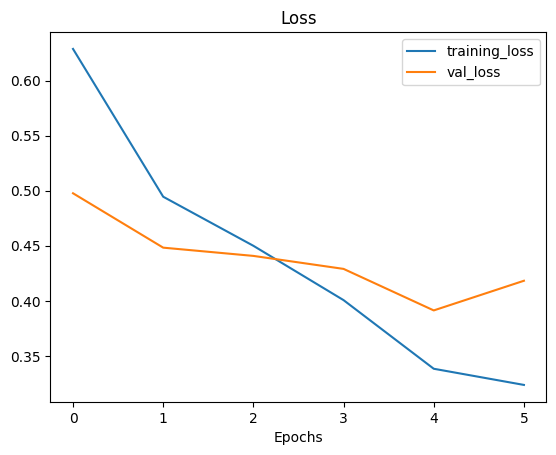

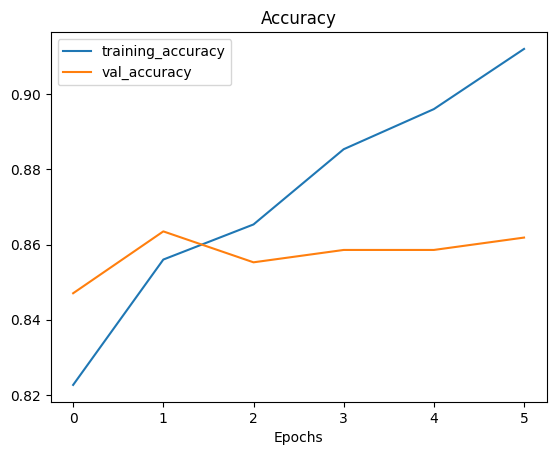

In [ ]:
#check out the loss curves of fine-tuned model
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Lets create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  compares two tensorflow history objects
  """
  #Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #combine the original history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  #Make plots for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  #Make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

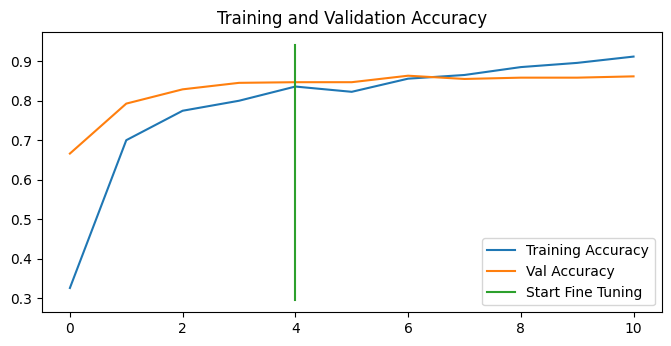

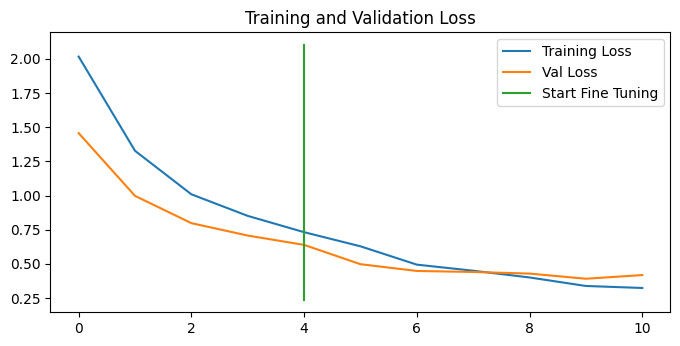

In [ ]:
compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

##Model 4: Fine-tuning and existing model on all of the data

In [ ]:
#Download and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-07-11 09:57:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M   252MB/s    in 2.0s    

2023-07-11 09:57:09 (252 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]



In [ ]:
#setup training and test dir
train_dir_all_data = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
walk_through_dir("/content/10_food_classes_all_data")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/trai

In [ ]:
#Setup data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test datset we've loaded in is the same as what we've been using for previous experiments(all experiments have used the same test datset)

In [ ]:
#Evaluate model 2(this is the fine tuned 10 percent of the data)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.4324 - accuracy: 0.8636


[0.4324389100074768, 0.8636000156402588]

In [ ]:
results_fine_tune_10_percent

[0.43243905901908875, 0.8636000156402588]

To train a fine tuning model(model 4) we need to revert model_2 back to its feature extraction weights

In [ ]:
#Load weights froom checkpoint, that way we can fine-tune from
#the same stage the 10 percent data model was fine-tuned from

model_2.load_weights(checkpoint_path)

ValueError: ignored

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.6245 - accuracy: 0.8452


[0.6244645714759827, 0.8452000021934509]

In [ ]:
 results_10_percent_data_aug

[0.624464750289917, 0.8452000021934509]

Steps that was followed:
1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation(model_2) and we saved the model's weights using 'ModelCheckpoint' callback.
2. Fine-tuned the same model on the same 10% of thev data for a further 5 epochs with top 10 layers of the base model unfrozen(model_3).
3. We saved the results and training logs eachtime
4. Reloaded the model from step 1 to do the same step 2 except this time we're going to use all of the data(model_4)

In [ ]:
#check which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [ ]:
#Lets drill into our base_model(efficientnetb0) and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
#compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
initial_epoch=5
#continue to trainn and fine-tune the model to our data(100% of the training data)
fine_tune_epochs = initial_epoch + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25*len(test_data)),
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230711-095740


Epoch 5/10
235/235 [==============================] - 79s 298ms/step - loss: 0.6580 - accuracy: 0.7908 - val_loss: 0.3681 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 60s 252ms/step - loss: 0.5219 - accuracy: 0.8340 - val_loss: 0.3287 - val_accuracy: 0.8832
Epoch 7/10
235/235 [==============================] - 51s 214ms/step - loss: 0.4730 - accuracy: 0.8491 - val_loss: 0.2677 - val_accuracy: 0.8947
Epoch 8/10
235/235 [==============================] - 68s 287ms/step - loss: 0.4253 - accuracy: 0.8625 - val_loss: 0.2792 - val_accuracy: 0.8997
Epoch 9/10
235/235 [==============================] - 48s 200ms/step - loss: 0.3899 - accuracy: 0.8725 - val_loss: 0.2801 - val_accuracy: 0.9013
Epoch 10/10
235/235 [==============================] - 46s 195ms/step - loss: 0.3603 - accuracy: 0.8841 - val_loss: 0.2730 - val_accuracy: 0.8980


In [ ]:
#Evaluate the test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 82ms/step - loss: 0.2800 - accuracy: 0.9004


[0.2800232768058777, 0.9003999829292297]

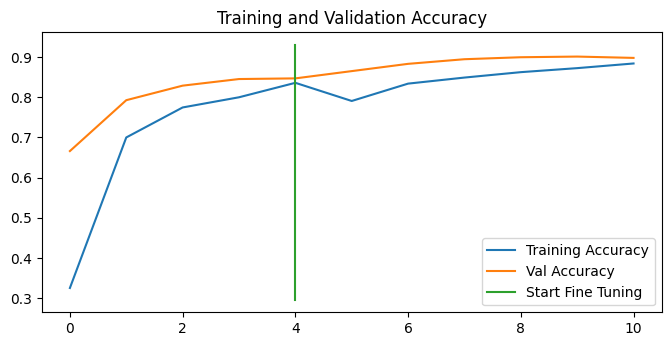

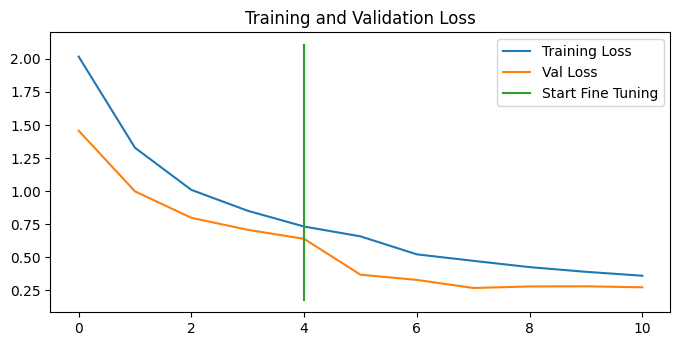

In [ ]:
#how did fine tuning go with more data?
compare_historys(original_history = history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)